<a href="https://colab.research.google.com/github/minhcong01/Baitap_AI/blob/main/PLoai_Banh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


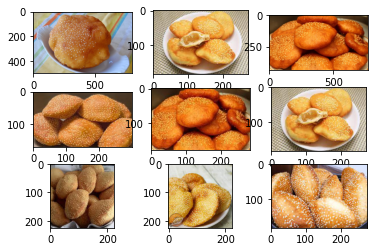

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/DATA/BANH/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'banhtieu.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [6]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/DATA/BANH/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhbotloc.'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhdalon.'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhtieu.'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhxeo.'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('NhanDangbanh_photos.npy', photos)
save('NhanDangbanh_labels.npy', labels)

(39, 150, 150, 3) (39,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=20, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 32)                5607456   
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 5,608,484
Trainable params: 5,608,484
Non-trainable params: 0
______________________________________________

In [8]:
model.save('/content/drive/MyDrive/DATA/NhanDangbanh.h5')

In [10]:
from keras.models import load_model
models=load_model('/content/drive/MyDrive/DATA/NhanDangbanh.h5')

Ảnh: banhdalon.


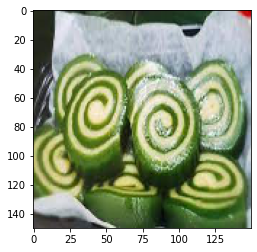

In [17]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/DATA/NhanDangbanh.h5')
img = load_img('/content/drive/MyDrive/DATA/TEST/banhdalon.11.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['banhbotloc.','banhdalon.','banhtieu.','banhxeo.']
print('Ảnh:',a[pred])

Ảnh: banhtieu.


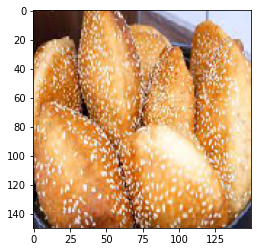

In [18]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/DATA/NhanDangbanh.h5')
img = load_img('/content/drive/MyDrive/DATA/TEST/banhtieu.11.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['banhbotloc.','banhdalon.','banhtieu.','banhxeo.']
print('Ảnh:',a[pred])

Ảnh: banhxeo.


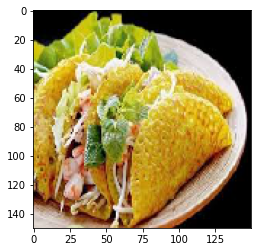

In [19]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/DATA/NhanDangbanh.h5')
img = load_img('/content/drive/MyDrive/DATA/TEST/banhxeo.12.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['banhbotloc.','banhdalon.','banhtieu.','banhxeo.']
print('Ảnh:',a[pred])

Ảnh: banhbotloc.


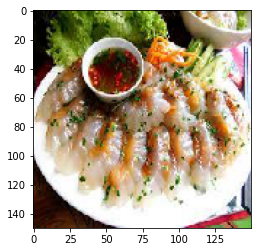

In [21]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('/content/drive/MyDrive/DATA/NhanDangbanh.h5')
img = load_img('/content/drive/MyDrive/DATA/TEST/banhbotloc.12.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['banhbotloc.','banhdalon.','banhtieu.','banhxeo.']
print('Ảnh:',a[pred])